In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [3]:
# 한글사용 가능
from matplotlib import font_manager, rc

font_path = "data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

[Text(0.5, 1.0, '시간별 통계')]

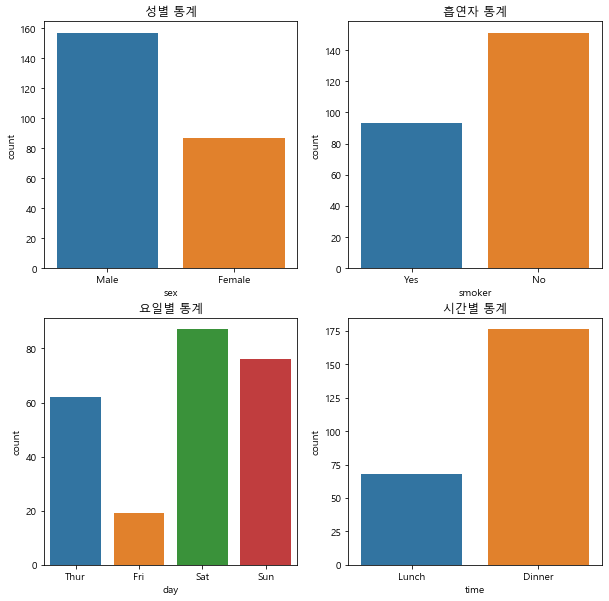

In [7]:
# 다중 시각화 , countplot
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,10)

sns.countplot(data = tips, x='sex', ax=ax1)
sns.countplot(data = tips, x='smoker', ax=ax2)
sns.countplot(data = tips, x='day', ax=ax3)
sns.countplot(data = tips, x='time', ax=ax4)

ax1.set(title="성별 통계")
ax2.set(title="흡연자 통계")
ax3.set(title="요일별 통계")
ax4.set(title="시간별 통계")

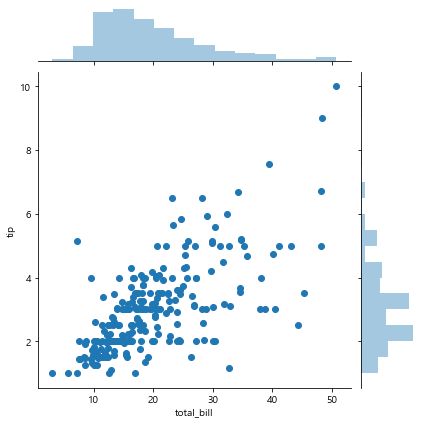

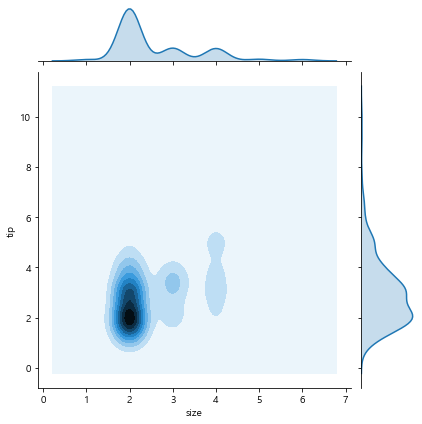

In [24]:
# jointplot
sns.jointplot(x='total_bill', y='tip', data=tips)
sns.jointplot(x='size', y='tip', kind='kde' ,data=tips)

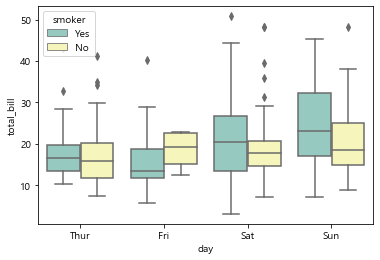

In [25]:
# boxplot
sns.boxplot(x = 'day', y = 'total_bill',data=tips, hue='smoker', palette='Set3')

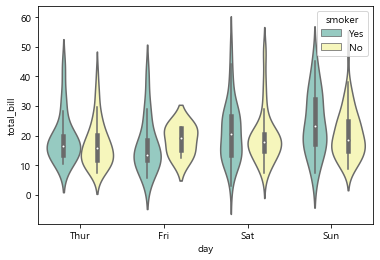

In [27]:
# violinplot
sns.violinplot(x = 'day', y = 'total_bill',data=tips, hue='smoker', palette='Set3')

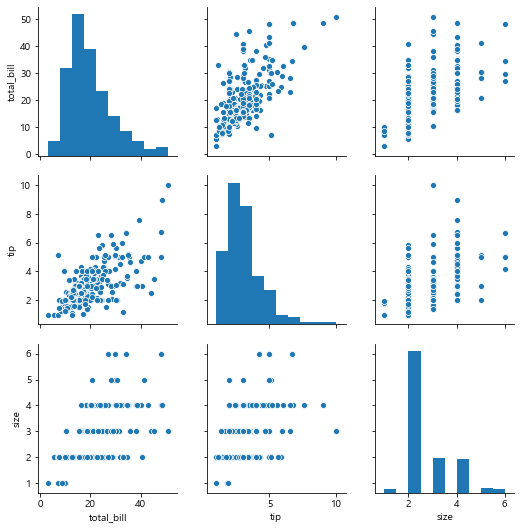

In [26]:
# 수치에 해당하는 그래프를 전반적으로 그려줌
# 관계그래프 pairplot

sns.pairplot(data = tips)

''' 내가 원하는 그래프로 그릴 수 있음
pg = sns.PairGrid(tips) # pairgrid 형태 만들기
pg.map_upper(sns.regplot) # 위쪽 그래프에 넣을 plot 
pg.map_lower(sns.kdeplot) # 아래쪽 그래프에 넣을 plot 
pg.map_diag(sns.distplot) # 가운데 그래프에 넣을 plot 
'''

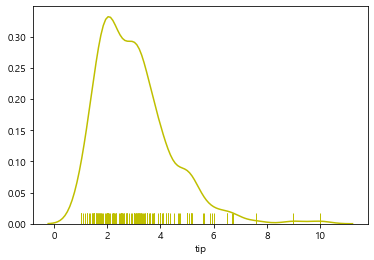

In [33]:
# displot -> hist 그래프와 kdeplot을 통합한 그래프 이며, 분포와 밀도를 확인할 수 있다.
sns.distplot(tips.tip, rug=True, hist=False, kde=True, color='Y', vertical=False)

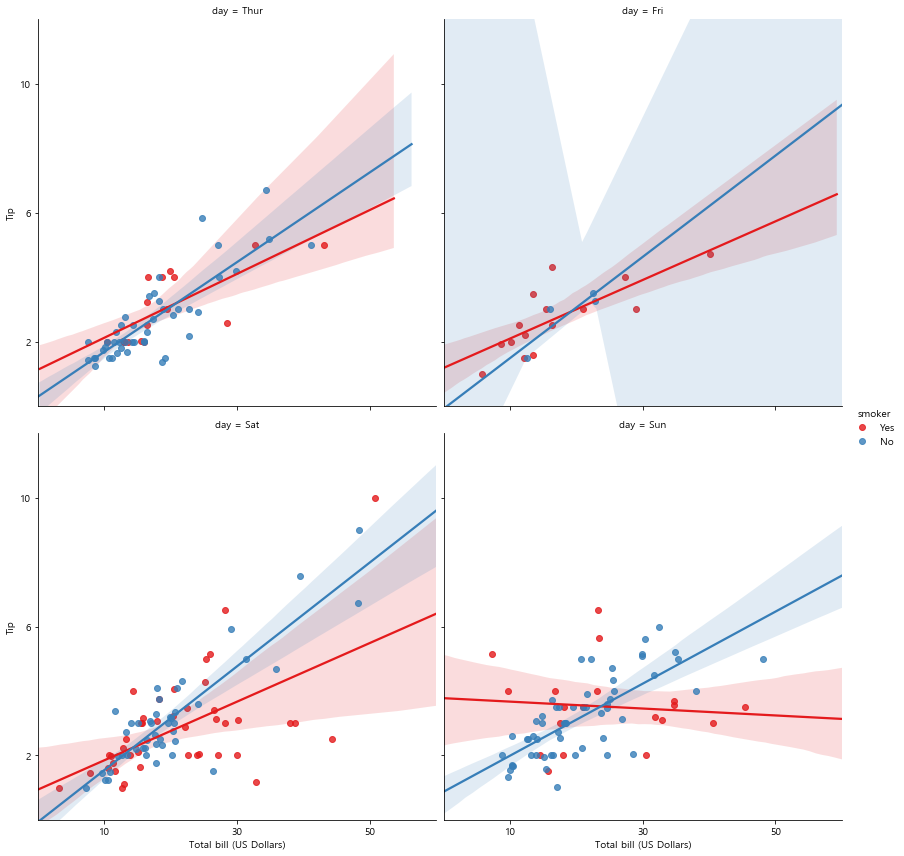

In [41]:
# lmplot ->  column 간의 선형관계를 확인하기에 용이한 차트, outlier도 같이 짐작해 볼 수 있다.

g = sns.lmplot(x='total_bill', y='tip', hue='smoker', col='day', col_wrap=2, height=6, data=tips, palette="Set1")
g = (g.set_axis_labels("Total bill (US Dollars)", "Tip")
      .set(xlim=(0, 60), ylim=(0, 12),
           xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.02))

In [ ]:
#이외에도 barplot, scatterplot, lineplot, relplot, catplot 등 있음
# --color-- 
# 기본적인 palette : deep, muted, pastel, bright, dark, colorblind
# sns.set_palette("pastel")
# 이외 diverging_colors = sns.color_palette("RdBu", 10)